<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/04_svd_multilinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVD:Multi-Linear Regression-Cement heat generation data

Regression is an important statistical tool to relate variables to one another based on data.

We assume that the data is linearly related, and we use the pseudo-inverse to find the least-squares solution for the slope x below (blue dashed line).

$$ Ax = b $$
$$ A = U \Sigma V^T $$
$$ x = A^{-1}b $$
$$ x = \left ( U \Sigma V^T \right )^{-1} b $$
$$ x = \tilde V \tilde \Sigma^{-1} \tilde U^* b $$

Where, $\tilde \Sigma = ||a||_2, \tilde V = 1$ and $\tilde U = \frac {a}{||a||_2}$. so we can take the left pseudo-inverse.

$$ x = \frac {a*b}{||a||_2^2} $$

<img src='https://github.com/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/images/svd3.png?raw=1' width='400'/>

This makes physical sense, if we think of $x$ as the value that best maps our vector $a$ to the vector $b$. Then, the best single value $x$ is obtained by taking the dot product of $b$ with the normalized $a$ direction. We then add a second normalization factor $||a||_2$ because the $a$ in is not normalized.


Note that strange things happen if you use row vectors instead of column vectors. 

Also, if the noise magnitude becomes large relative to the slope $x$, the pseudoinverse will undergo a phase-change in accuracy, related to the hard-thresholding results.

##Setup

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [ ]:
%%shell

wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/hald_ingredients.csv
wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/hald_heat.csv


##Cement heat generation

First, we begin with a simple built-in Matlab dataset that describes the heat generation
for various cement mixtures comprised of four basic ingredients.

In this problem, we are solving $Ax=b$, where $A \in R^{13 x 4}$, since there are four ingredients and heat measurements
for 13 unique mixtures.

The goal is to determine the weighting $x$ that relates the proportions
of the four ingredients to the heat generation. It is possible to find the minimum error solution using the SVD.

Alternatives, using regress and pinv, are
also explored.

Let's load data.

In [4]:
# Load dataset
A = np.loadtxt("hald_ingredients.csv", delimiter=",")
b = np.loadtxt("hald_heat.csv", delimiter=",")

Let's compute $Ax=b$ using the SVD approximation.

In [5]:
# Solve Ax=b using the SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b  

Let's plot the fit.

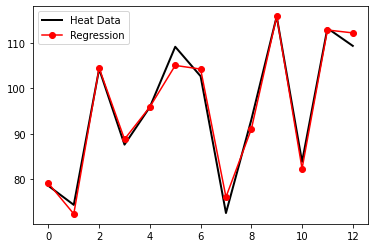

In [6]:
plt.plot(b, Color='k', LineWidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.legend()
plt.show()